In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
! pip install imblearn
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import shapiro
enc = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value= -1)

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [110]:
df = pd.read_csv("Breast_Cancer (1).csv")
print(df.shape)
df.head

(4024, 16)


<bound method NDFrame.head of       Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        

In [111]:
# checking for null values
df.isnull().sum()

# we don't have any null values . Therefore Data Cleaning is not necessary

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [112]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,25,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [113]:
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [114]:
# Number of unique columns
uni_col = df.columns.nunique()

# Number of unique rows
uni_row = df.nunique(axis=0)

print(f"Number of unique columns: {uni_col}")
print(f"Number of unique rows: {uni_row}")


Number of unique columns: 16
Number of unique rows: Age                        40
Race                        3
Marital Status              5
T Stage                     4
N Stage                     3
6th Stage                   5
differentiate               4
Grade                       4
A Stage                     2
Tumor Size                 51
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Reginol Node Positive      38
Survival Months           107
Status                      2
dtype: int64


In [115]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [116]:
import pandas as pd

# Load DataFrame
df = pd.read_csv('Breast_Cancer (1).csv')  # Replace with your file path

# Calculate IQR for 'Tumor Size'
Q1 = df['Tumor Size'].quantile(0.25)
Q3 = df['Tumor Size'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value
median_value = df['Tumor Size'].median()
#df.loc[df['Tumor Size'] < lower_bound, 'Tumor Size'] = median_value
df.loc[df['Tumor Size'] > upper_bound, 'Tumor Size'] = median_value

# Save the cleaned DataFrame, if needed
df.to_csv('Breast_Cancer_1.csv', index=False)


In [117]:
### ------------  ENCODING   ----------------
  

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df as DataFrame

# List of columns to encode
columns_to_encode = ['T Stage ', '6th Stage', 'N Stage', 'Race', 'differentiate', 'Marital Status', 'Grade', 'A Stage','Estrogen Status','Progesterone Status','Status']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the updated DataFrame
print(df.head())


   Age  Race  Marital Status  T Stage   N Stage  6th Stage  differentiate  \
0   68     2               1         0        0          0              1   
1   50     2               1         1        1          2              0   
2   58     2               0         2        2          4              0   
3   58     2               1         0        0          0              1   
4   47     2               1         1        0          1              1   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0      3        1           4                1                    1   
1      2        1          35                1                    1   
2      2        1          25                1                    1   
3      3        1          18                1                    1   
4      3        1          41                1                    1   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24         

In [118]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,25,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


In [119]:
from scipy.stats import shapiro
data = df
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        stat, p = shapiro(data[column].dropna())
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Sample looks Gaussian (normally distributed)')
        else:
            print('Sample does not look Gaussian (not normally distributed)')


Statistics=0.976, p=0.000
Sample does not look Gaussian (not normally distributed)
Statistics=0.436, p=0.000
Sample does not look Gaussian (not normally distributed)
Statistics=0.724, p=0.000
Sample does not look Gaussian (not normally distributed)
Statistics=0.804, p=0.000
Sample does not look Gaussian (not normally distributed)
Statistics=0.641, p=0.000
Sample does not look Gaussian (not normally distributed)
Statistics=0.835, p=0.000
Sample does not look Gaussian (not normally distributed)
Statistics=0.666, p=0.000
Sample does not look Gaussian (not normally distributed)
Statistics=0.788, p=0.000
Sample does not look Gaussian (not normally distributed)
Statistics=0.132, p=0.000
Sample does not look Gaussian (not normally distributed)
Statistics=0.963, p=0.000
Sample does not look Gaussian (not normally distributed)
Statistics=0.269, p=0.000
Sample does not look Gaussian (not normally distributed)
Statistics=0.458, p=0.000
Sample does not look Gaussian (not normally distributed)
Stat

In [120]:
# perform chi- square test for feature importance on Status

import pandas as pd
from scipy.stats import chi2_contingency


# Assuming df as DataFrame and 'Status' as target variable

# List of categorical columns (excluding 'Status')
categorical_columns = ['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months']  

# Dictionary to hold p-values
p_values = {}

for col in categorical_columns:
    # Creating a contingency table
    contingency_table = pd.crosstab(df[col], df['Status'])

    # Performing the Chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    # Storing the p-value for the feature
    p_values[col] = p

# Sorting features by their p-value
sorted_p_values = {k: v for k, v in sorted(p_values.items(), key=lambda item: item[1])}

# Display sorted features by importance
sorted_p_values
 

{'Survival Months': 2.918381381477759e-256,
 '6th Stage': 9.830332296203994e-60,
 'N Stage': 2.430140625217663e-59,
 'Reginol Node Positive': 2.2926910134541016e-51,
 'Estrogen Status': 3.0526081181489177e-31,
 'Progesterone Status': 5.392079685518964e-29,
 'differentiate': 3.0913516733336542e-24,
 'Grade': 3.0913516733336542e-24,
 'T Stage ': 2.7790953099786567e-22,
 'A Stage': 2.2264262284984456e-09,
 'Race': 8.440928800112451e-07,
 'Tumor Size': 3.162931073136348e-06,
 'Marital Status': 1.1027694804532703e-05,
 'Age': 1.880215544112303e-05,
 'Regional Node Examined': 0.045010588788791626}

In [121]:
from scipy.stats import kendalltau

# List of categorical columns
categorical_columns = ['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

# Dictionary to store correlation coefficients  
kendall_corrs = {}

for col in categorical_columns:
    # Calculate Kendall's tau 
    corr, p_value = kendalltau(df[col], df['Status'])
    
    # Store coefficient
    kendall_corrs[col] = abs(corr)

# Sort features
sorted_corrs = {k: v for k, v in sorted(kendall_corrs.items(), key=lambda item: item[1], reverse=True)} 

# Print correlations
print(sorted_corrs)

{'Survival Months': 0.3414476058954227, 'N Stage': 0.23259621440070583, '6th Stage': 0.21311783212414173, 'Reginol Node Positive': 0.19348969761084767, 'Estrogen Status': 0.18465036100000787, 'Progesterone Status': 0.177079299279493, 'T Stage ': 0.1383647725844635, 'Grade': 0.13832520105332805, 'Tumor Size': 0.097926820157147, 'A Stage': 0.09658422296835839, 'Age': 0.05183543551752469, 'differentiate': 0.03948458039928033, 'Race': 0.029892035787205822, 'Regional Node Examined': 0.023994485657988226, 'Marital Status': 0.02026580645683299}


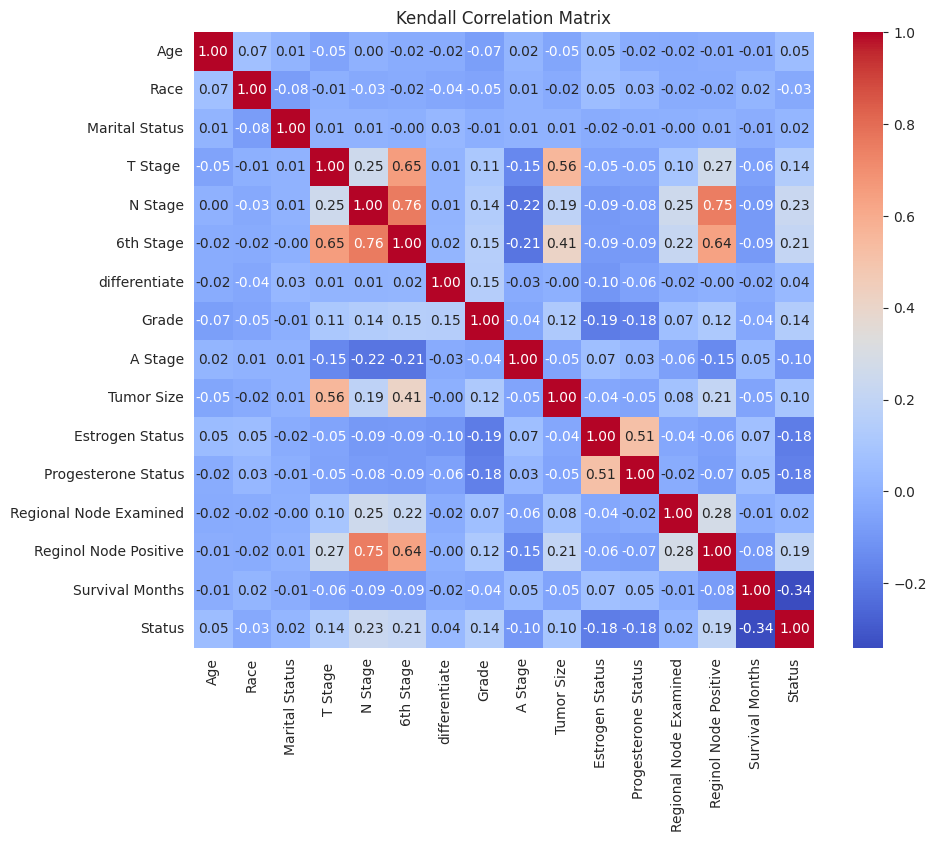

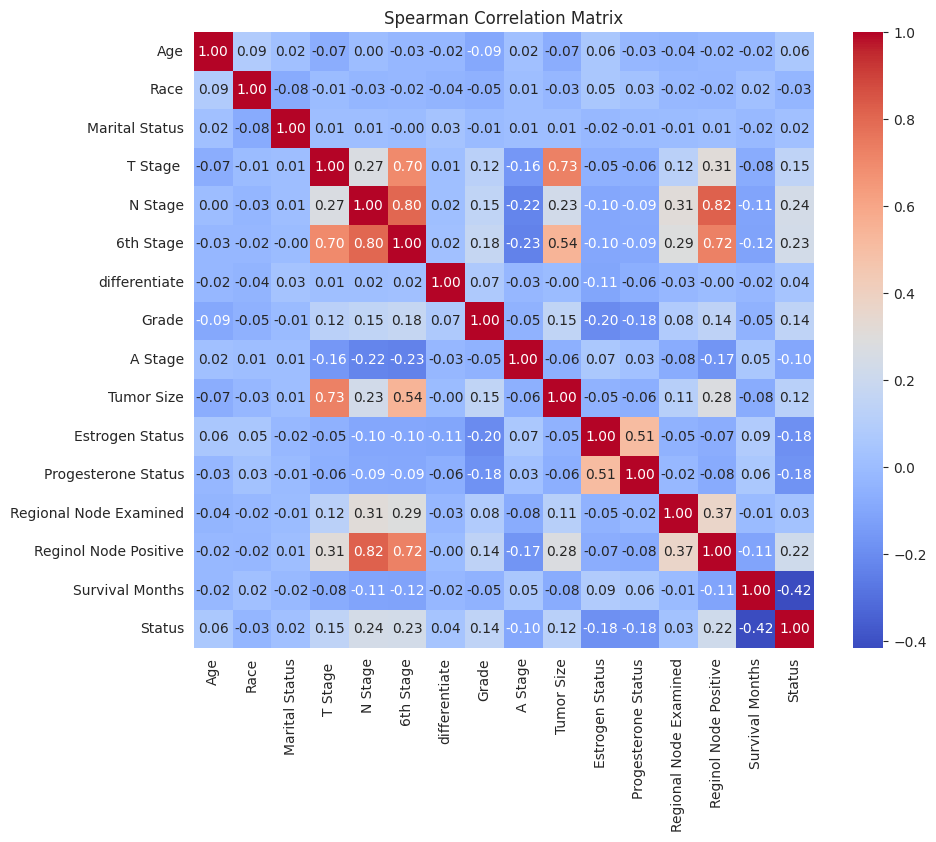

In [122]:
kendall_corr = df.corr(method='kendall')
spearman_corr = df.corr(method='spearman')

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(kendall_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Kendall Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix")
plt.show()


<Axes: >

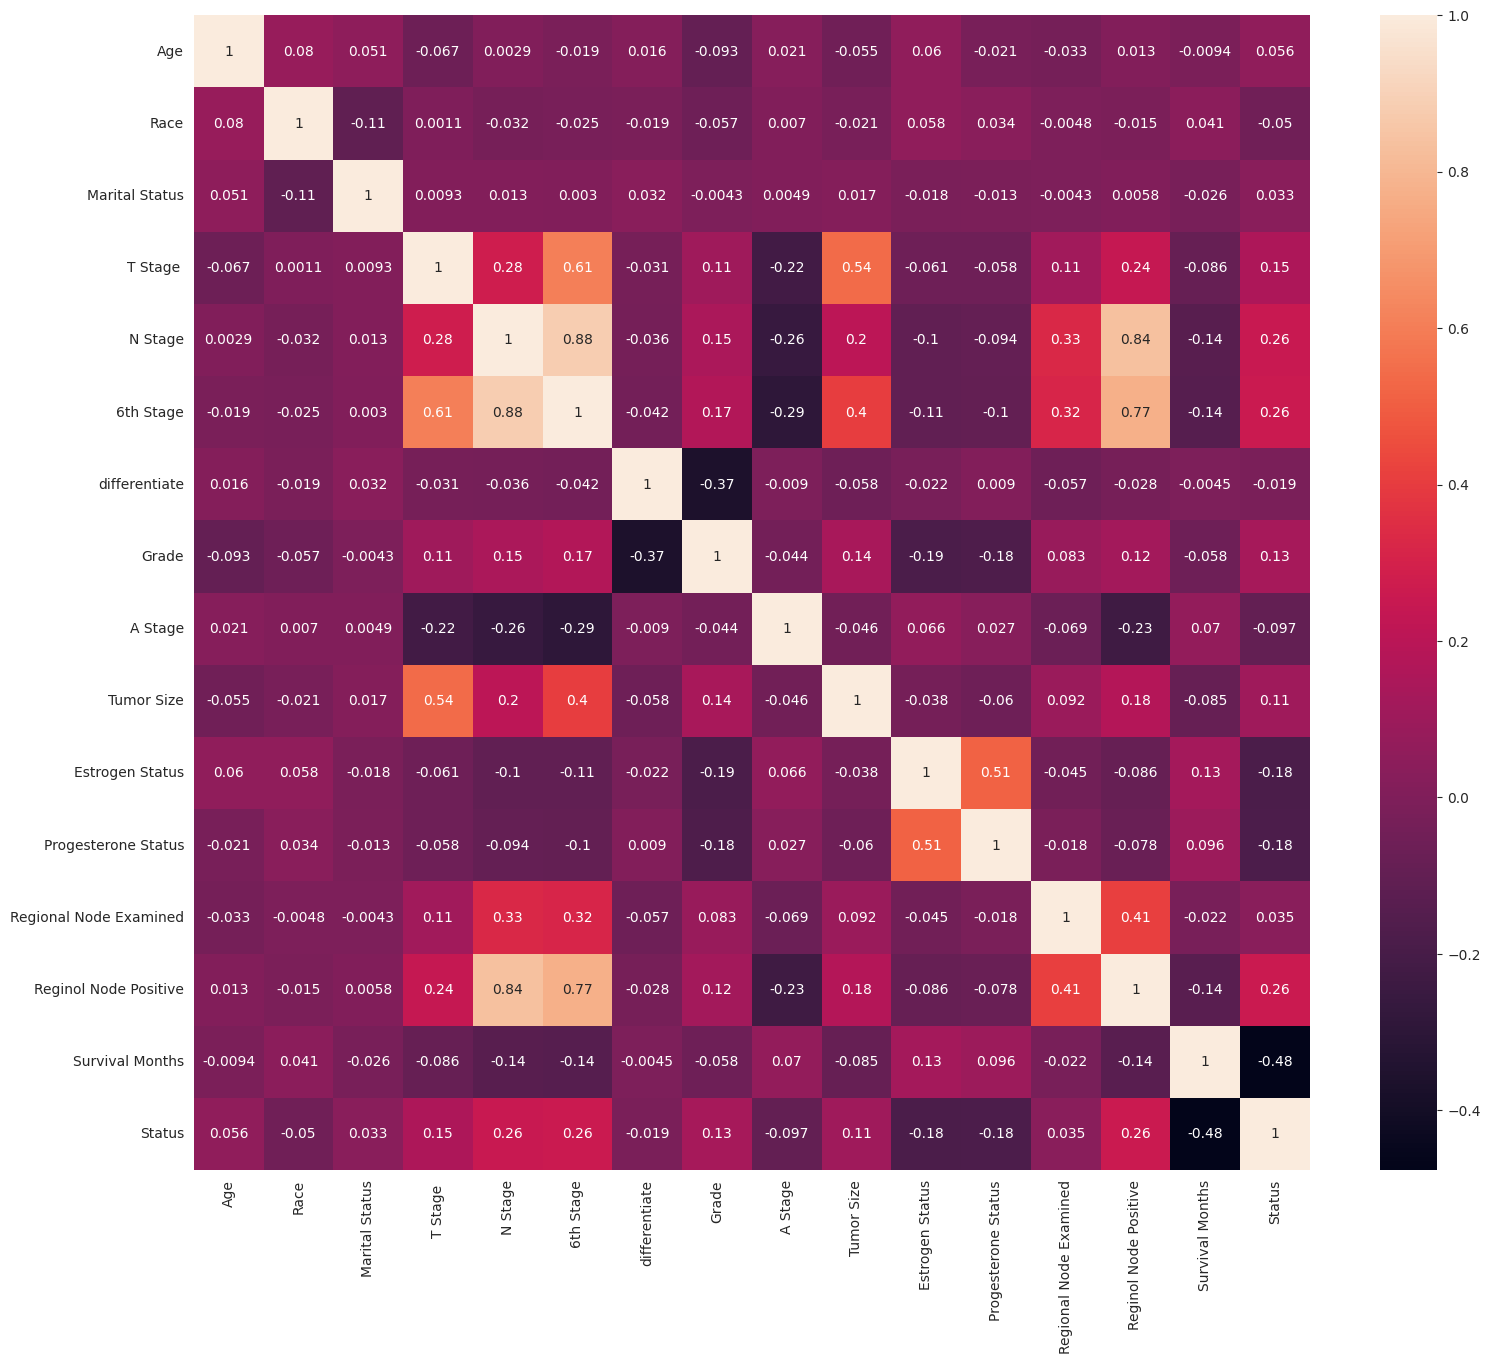

In [123]:
###  -----------   CORRELATION MATRIX ------------

corematrix = df.corr()
round(corematrix,2)
plt.figure(figsize=(18,15))
sns.heatmap(corematrix, annot=True)

In [124]:
# Print all column names to check
print(df.columns)


Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [125]:
from imblearn.over_sampling import SMOTE
from collections import Counter
#Aim 2
#split into X/y
X = df[['Age', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status']]
y = df["Status"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,random_state=42)


# Summarize class distribution
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Summarize new class distribution
print("After SMOTE:", Counter(y_train))




Before SMOTE: Counter({0: 2723, 1: 496})
After SMOTE: Counter({0: 2723, 1: 2723})


               Feature  Importance
9  Progesterone Status    1.271159
6              A Stage    1.009127
8      Estrogen Status    0.918756
3            6th Stage    0.573601
2              N Stage    0.456802
4        differentiate    0.384943
1             T Stage     0.235242
5                Grade    0.081667
0                  Age    0.025302
7           Tumor Size    0.008223


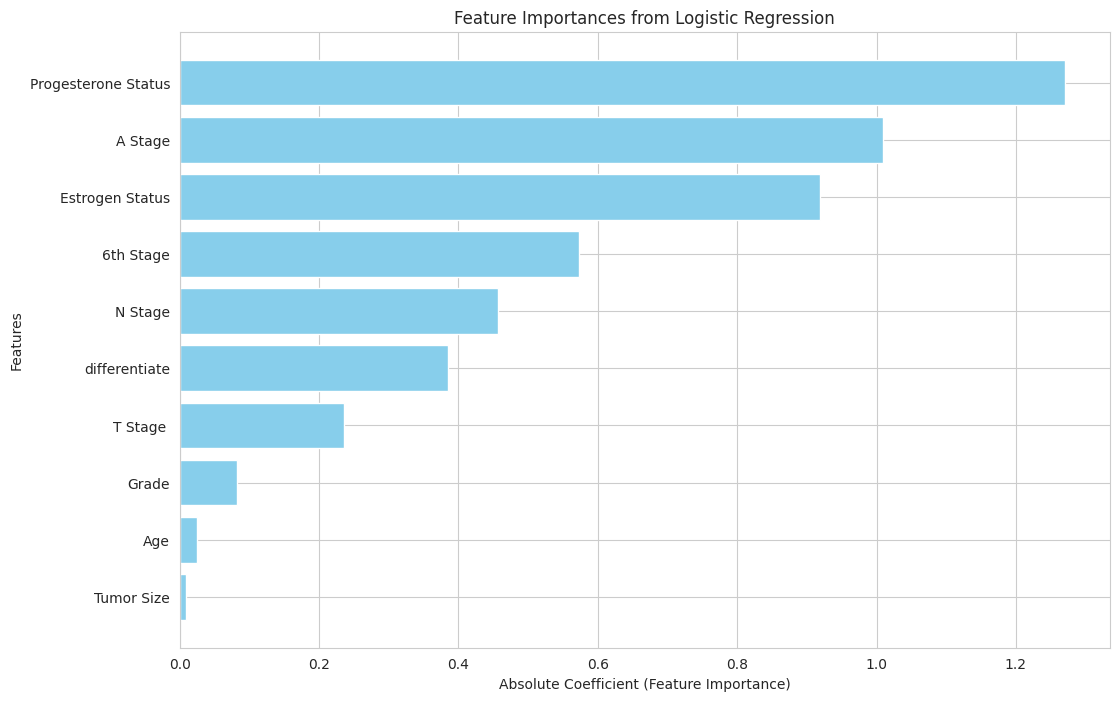

In [126]:
### FEATURE IMPORTANCE ---------------    METHOD 2
###  FEATURE IMPORTANCE DERIVED FROM LOGISTIC REGRESSION


# Assuming X_train and y_train are already defined and LogisticRegression is suitable for dataset

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # max_iter might need to be increased if the algorithm doesn't converge
lr_model.fit(X_train, y_train)

# Get feature importances (coefficients)
lr_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(lr_model.coef_[0])
})

# Sort by importance
lr_feature_importances = lr_feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print(lr_feature_importances)

# Visual Representation
plt.figure(figsize=(12, 8))
plt.barh(lr_feature_importances['Feature'], lr_feature_importances['Importance'], color='skyblue')
plt.xlabel('Absolute Coefficient (Feature Importance)')
plt.ylabel('Features')
plt.title('Feature Importances from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


Accuracy: 	 0.7130434782608696
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       685
           1       0.22      0.36      0.27       120

    accuracy                           0.71       805
   macro avg       0.55      0.57      0.55       805
weighted avg       0.78      0.71      0.74       805

Confusin Matrix: 
 [[531 154]
 [ 77  43]]


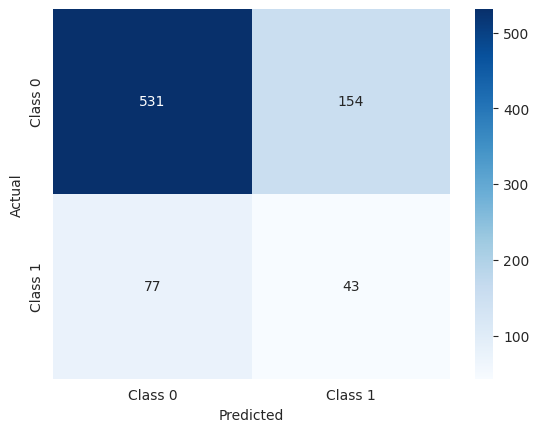

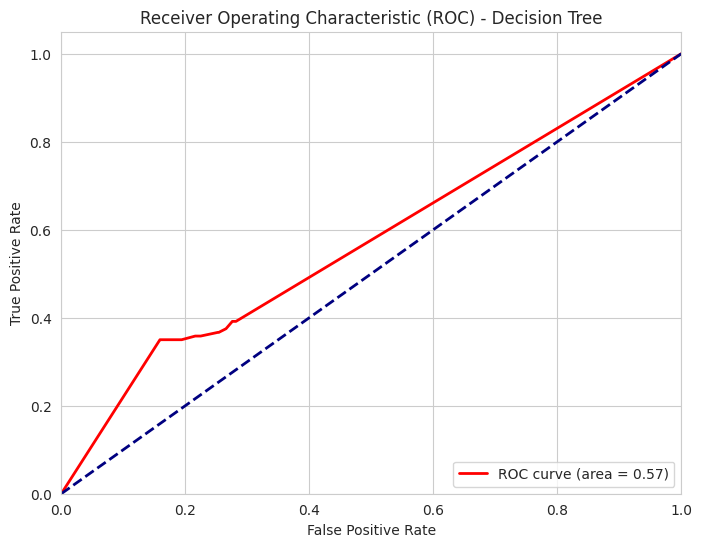

In [127]:

##----------------    DECISION TREE CLASSIFIER MODEL -------------

import seaborn as sns
from sklearn.metrics import confusion_matrix
columns_consider= ['Age', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status']  
# Model building using DECISION TREE
dtc = DecisionTreeClassifier(random_state = 606)
dtc.fit(X_train[columns_consider], y_train)
y_pred_dt= dtc.predict(X_test[columns_consider])

# calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_dt))

# Visual Representation of confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# ROC for decision tree classifier
dtc = DecisionTreeClassifier(random_state=606)
dtc.fit(X_train[columns_consider], y_train)

y_scores_dt = dtc.predict_proba(X_test[columns_consider])[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree')
plt.legend(loc="lower right")
plt.show()


Accuracy: 	 0.7503105590062111
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       685
           1       0.27      0.41      0.33       120

    accuracy                           0.75       805
   macro avg       0.58      0.61      0.59       805
weighted avg       0.80      0.75      0.77       805

Confusin Matrix: 
 [[555 130]
 [ 71  49]]


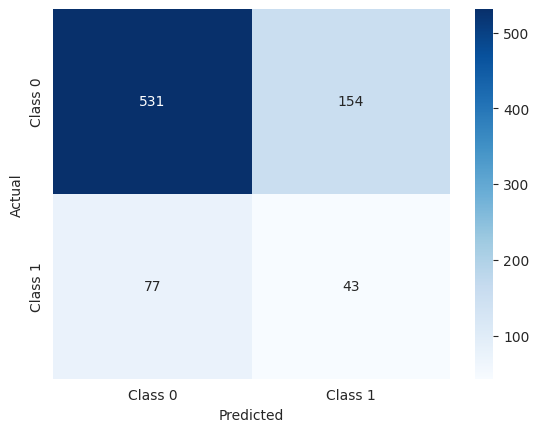

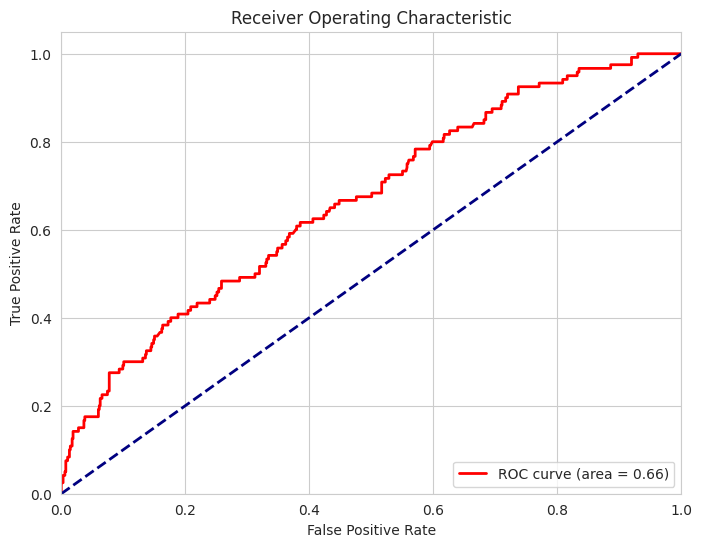

In [128]:

## --------------------------  XBBOOST CLASSIFIER MODEL  --------------------------------

# Model building using XGBOOST
columns_required=columns_consider
xgbc = xgb.XGBClassifier(random_state = 606)
xgbc.fit(X_train[columns_required], y_train)
y_pred_xg= xgbc.predict(X_test[columns_required])

#calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_xg))

# Visual Representation of confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC for XG Boost classifier
y_pred_xg = xgbc.predict_proba(X_test[columns_required])[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_xg)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Accuracy: 	 0.7093167701863354
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       685
           1       0.22      0.38      0.28       120

    accuracy                           0.71       805
   macro avg       0.55      0.57      0.55       805
weighted avg       0.78      0.71      0.74       805

Confusin Matrix: 
 [[525 160]
 [ 74  46]]


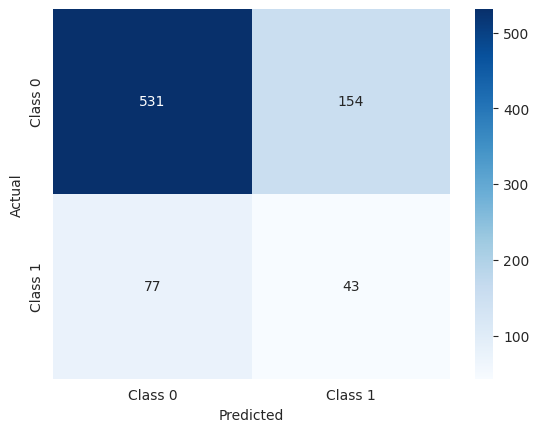

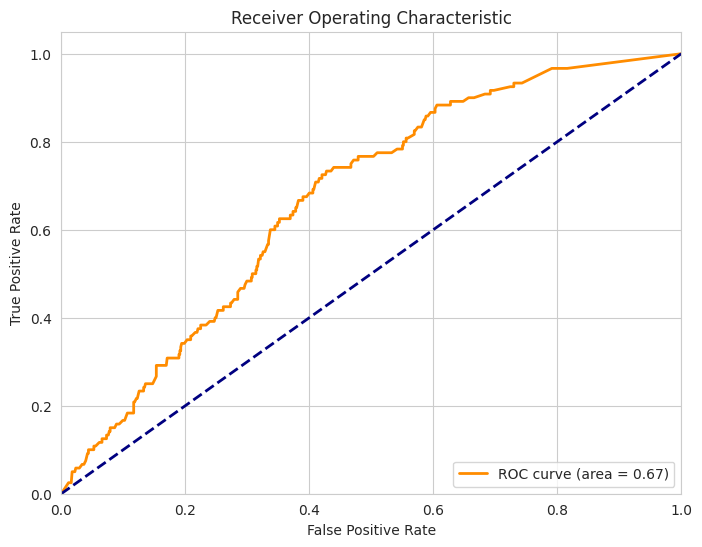

In [129]:
# Model building using RANDOMFOREST
rfc = RandomForestClassifier(random_state = 606)
rfc.fit(X_train[columns_required], y_train)
y_pred= rfc.predict(X_test[columns_required])
print("Accuracy: \t",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred))

# Visual Representation of confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC for Random Forest Classifier

rfc = RandomForestClassifier(random_state = 606)
rfc.fit(X_train[columns_required], y_train)
y_pred = rfc.predict(X_test[columns_required])

y_pred_prob = rfc.predict_proba(X_test[columns_required])[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Accuracy: 	 0.7354037267080745
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       685
           1       0.28      0.50      0.36       120

    accuracy                           0.74       805
   macro avg       0.59      0.64      0.60       805
weighted avg       0.81      0.74      0.76       805

Confusin Matrix: 
 [[532 153]
 [ 60  60]]


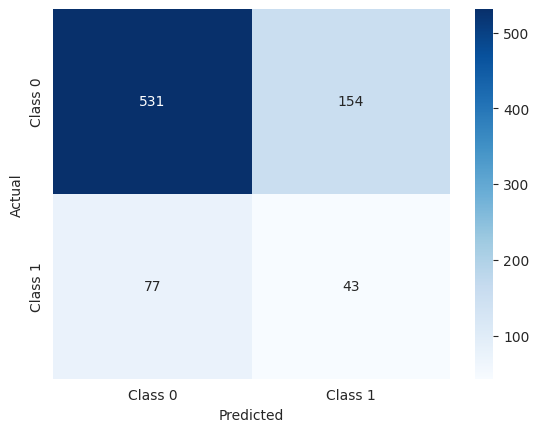

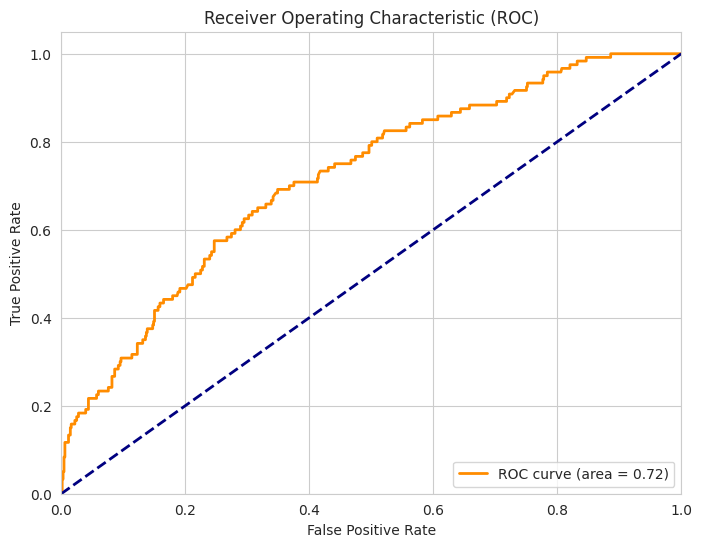

In [130]:
# Model building using Logistic Regression
lrc = LogisticRegression()
lrc.fit(X_train[columns_required], y_train)
y_pred_lr= lrc.predict(X_test[columns_required])


#calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_lr))

# Visual Representation of confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC FOR LOGISTIC REGRESSION

y_pred_prob = lrc.predict_proba(X_test[columns_required])[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

Accuracy: 	 0.6819875776397516
              precision    recall  f1-score   support

           0       0.87      0.73      0.80       685
           1       0.20      0.38      0.26       120

    accuracy                           0.68       805
   macro avg       0.54      0.56      0.53       805
weighted avg       0.77      0.68      0.72       805

Confusin Matrix: 
 [[503 182]
 [ 74  46]]


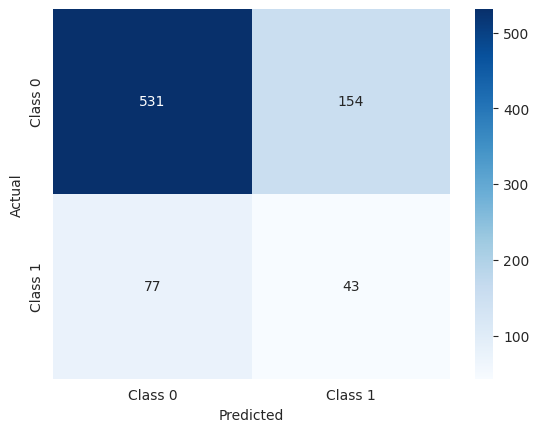

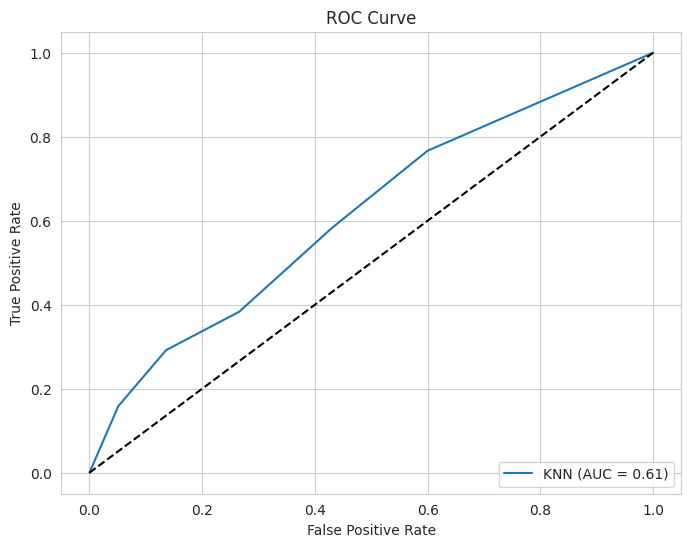

In [131]:
# Model building using KNN Classifier
knc = KNeighborsClassifier( metric='minkowski')
knc.fit(X_train[columns_required], y_train)
y_pred_knc= knc.predict(X_test[columns_required])
#Calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_knc))
print(classification_report(y_test, y_pred_knc))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_knc))

# Visual Representation of confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

y_pred_prob_knc = knc.predict_proba(X_test[columns_required])[:, 1]

# Calculate ROC Curve
fpr_knc, tpr_knc, thresholds_knc = roc_curve(y_test, y_pred_prob_knc)

# Calculate AUC (Area under the ROC Curve)
auc_knc = auc(fpr_knc, tpr_knc)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knc, tpr_knc, label=f'KNN (AUC = {auc_knc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

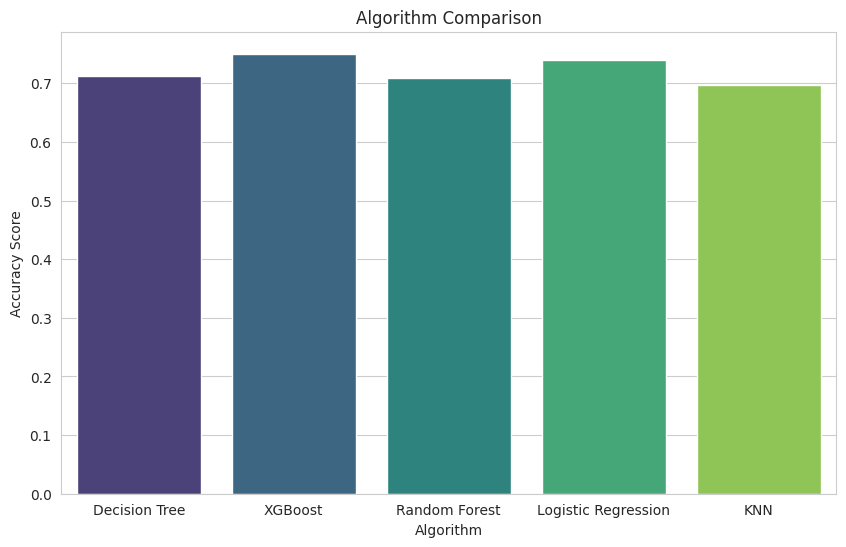

In [132]:
# Assuming X_train, X_test, y_train, y_test are already defined and 'columns_consider' as list of features

# Decision Tree
dtc = DecisionTreeClassifier(random_state=606)
dtc.fit(X_train[columns_consider], y_train)
y_pred_dt = dtc.predict(X_test[columns_consider])
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# XGBoost
xgbc = xgb.XGBClassifier(random_state=606)
xgbc.fit(X_train[columns_consider], y_train)
y_pred_xg = xgbc.predict(X_test[columns_consider])
accuracy_xgb = accuracy_score(y_test, y_pred_xg)

# Random Forest
rfc = RandomForestClassifier(random_state=606)
rfc.fit(X_train[columns_consider], y_train)
y_pred_rf = rfc.predict(X_test[columns_consider])
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_consider])
X_test_scaled = scaler.transform(X_test[columns_consider])

lrc = LogisticRegression()
lrc.fit(X_train_scaled, y_train)
y_pred_lr = lrc.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# KNN Classifier
knc = KNeighborsClassifier(metric='minkowski')
knc.fit(X_train_scaled, y_train)
y_pred_knc = knc.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knc)

# Create a dictionary of accuracy scores
accuracy_scores = {
    'Decision Tree': accuracy_dt,
    'XGBoost': accuracy_xgb,
    'Random Forest': accuracy_rf,
    'Logistic Regression': accuracy_lr,
    'KNN': accuracy_knn
}

# Convert dictionary to lists for plotting
algorithms = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Create bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=algorithms, y=scores, palette="viridis")

# Adding the aesthetics
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')

# Show the plot
plt.show()


In [133]:
#Building machine learning model 
model = LogisticRegression()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7354037267080745

In [134]:
# Cross validation of machine learning
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.85 (+/- 0.01)


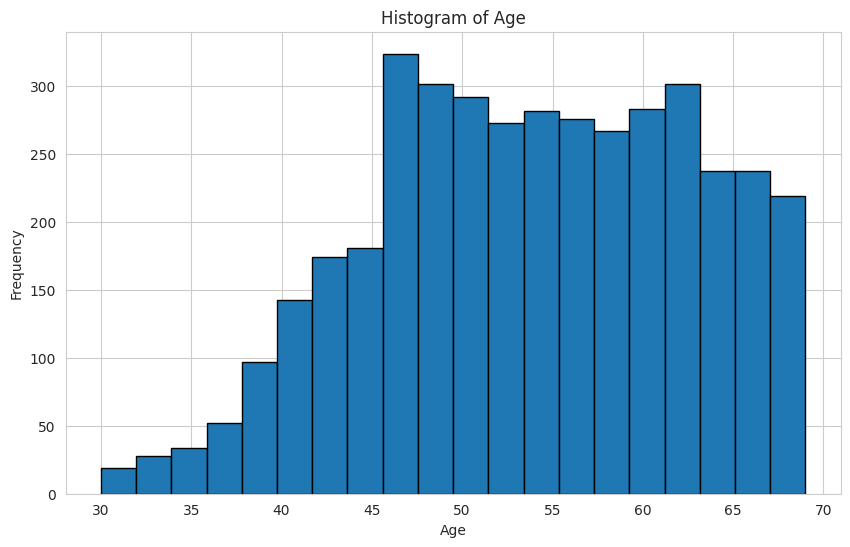

In [135]:
### -------------  Visualizaztions -------------------

##   Distribution of People Age in the Data

# Assuming DataFrame is named 'data' and has a column 'Age'
plt.figure(figsize=(10, 6))

# Create a histogram for the 'Age' column
plt.hist(df['Age'], bins=20, edgecolor='black')

# Add title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()


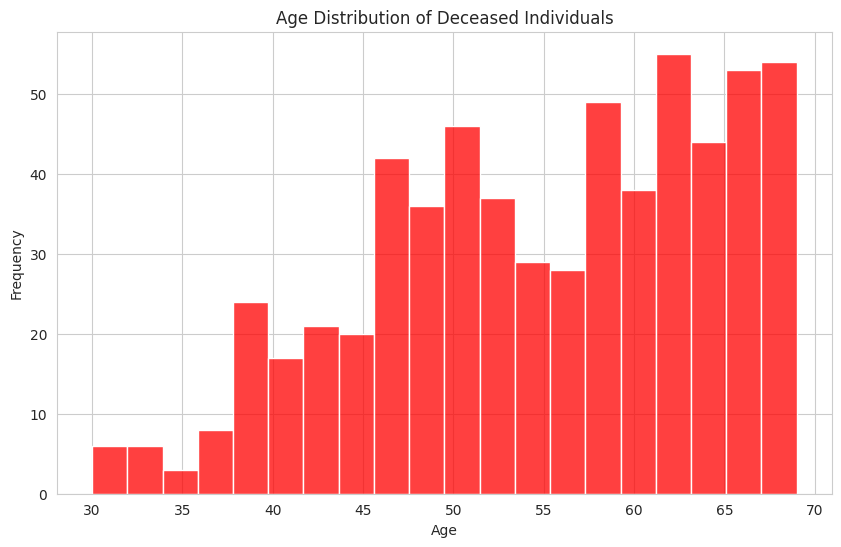

In [136]:


###  ---------- Age Distribution of Breast Cancer Deceased ----------------- 

# Assuming DataFrame is named 'data', 'Age' is the age column, and 'Status' is the status column
# Let's assume '1' in 'Status' indicates death

# Filter the DataFrame for individuals who died
deceased = df[df['Status'] == 1]

plt.figure(figsize=(10, 6))

# Create a histogram for the 'Age' of deceased individuals
sns.histplot(deceased['Age'], bins=20, kde=False, color='red')

# Add title and labels
plt.title('Age Distribution of Deceased Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [137]:
tumor_size_summary = df.describe()

# Print the summary
print(tumor_size_summary)

               Age         Race  Marital Status     T Stage       N Stage  \
count  4024.000000  4024.000000     4024.000000  4024.000000  4024.000000   
mean     53.972167     1.775845        1.371272     0.784791     0.438370   
std       8.963134     0.564465        1.063637     0.765531     0.693479   
min      30.000000     0.000000        0.000000     0.000000     0.000000   
25%      47.000000     2.000000        1.000000     0.000000     0.000000   
50%      54.000000     2.000000        1.000000     1.000000     0.000000   
75%      61.000000     2.000000        1.000000     1.000000     1.000000   
max      69.000000     2.000000        4.000000     3.000000     2.000000   

         6th Stage  differentiate        Grade      A Stage   Tumor Size  \
count  4024.000000    4024.000000  4024.000000  4024.000000  4024.000000   
mean      1.321819       0.690358     2.131710     0.977137    23.807406   
std       1.266624       1.016418     0.642398     0.149485    10.284708   
mi

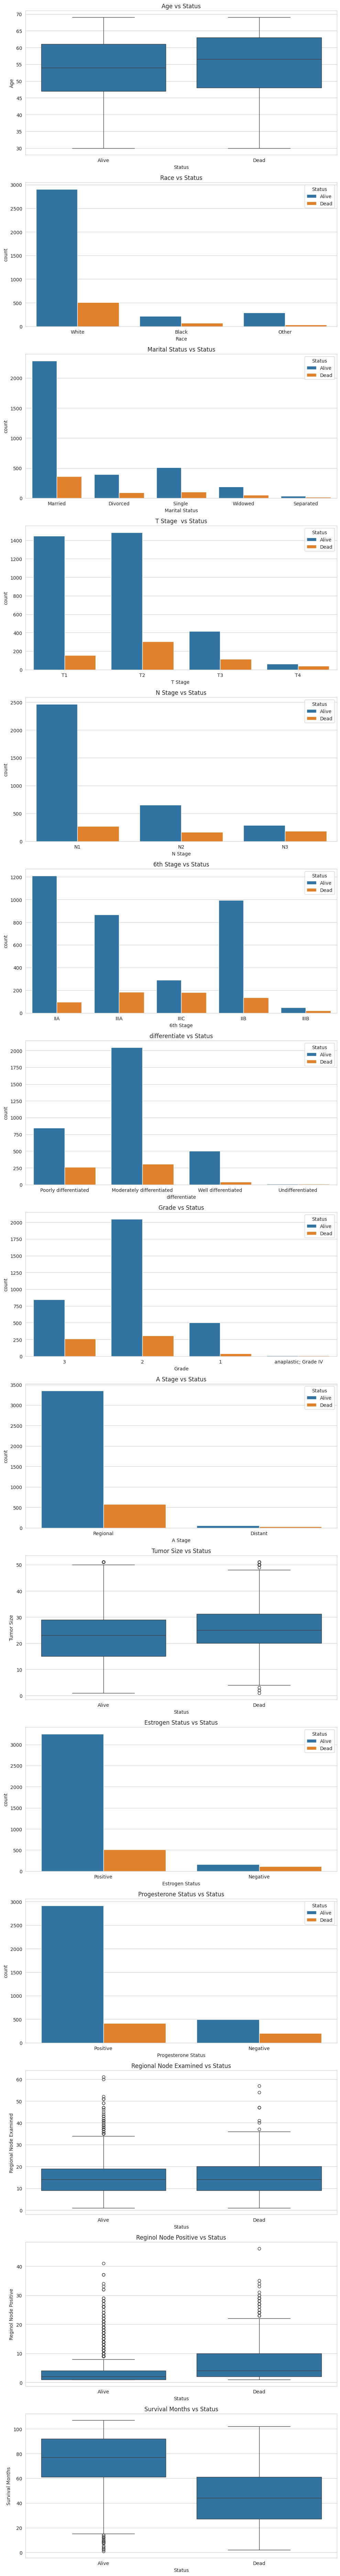

In [138]:
df = pd.read_csv("Breast_Cancer_1.csv")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Assuming 'Status' as target column
target_col = 'Status'

# Define the number of rows needed for subplots
num_rows = len(df.columns) - 1  # excluding the target column

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 5 * num_rows))

# Iterate through columns and create plots
for i, column in enumerate(df.columns):
    if column == target_col:
        continue  # Skip the target column

    ax = axes[i] if num_rows > 1 else axes  # Handle case of single subplot

    if column in numeric_cols:
        # For numeric columns, use a boxplot or scatterplot
        sns.boxplot(x=target_col, y=column, data=df, ax=ax)
       

    elif column in categorical_cols:
        # For categorical columns, use a countplot or barplot
        sns.countplot(x=column, hue=target_col, data=df, ax=ax)
        # Alternatively, for barplot: sns.barplot(x=target_col, y=column, data=df, ax=ax)

    ax.set_title(f'{column} vs {target_col}')

plt.tight_layout()
plt.show()

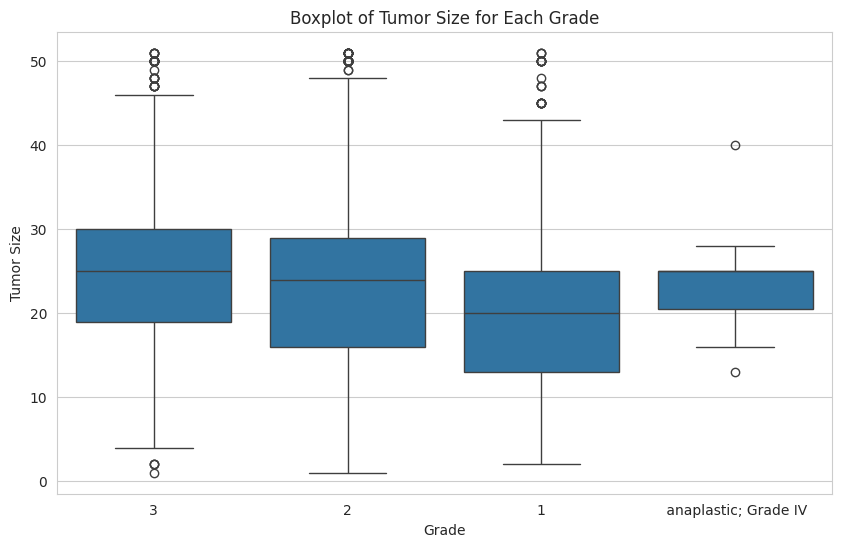

In [139]:
# Visualization codes
data=df
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Grade', y='Tumor Size')
plt.title('Boxplot of Tumor Size for Each Grade')
plt.xlabel('Grade')
plt.ylabel('Tumor Size')
plt.show()


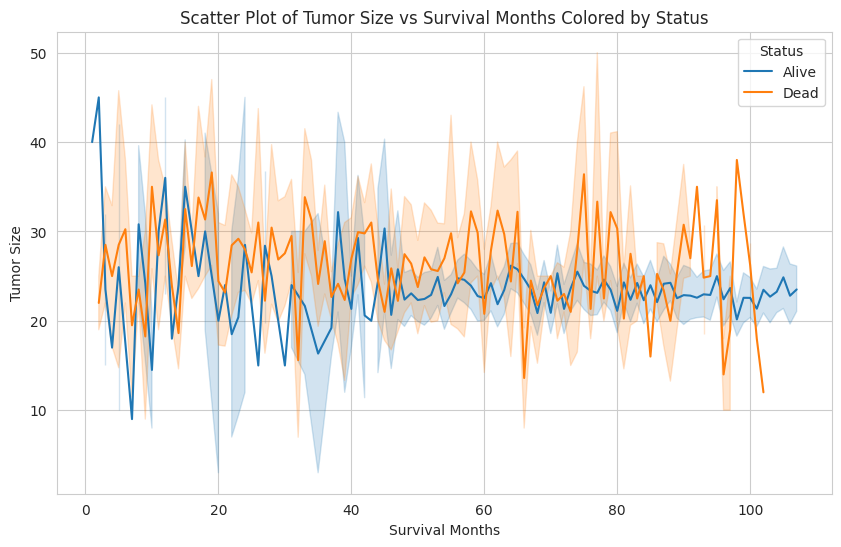

In [140]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Survival Months', y='Tumor Size', hue='Status')
plt.title('Scatter Plot of Tumor Size vs Survival Months Colored by Status')
plt.xlabel('Survival Months')
plt.ylabel('Tumor Size')
plt.show()


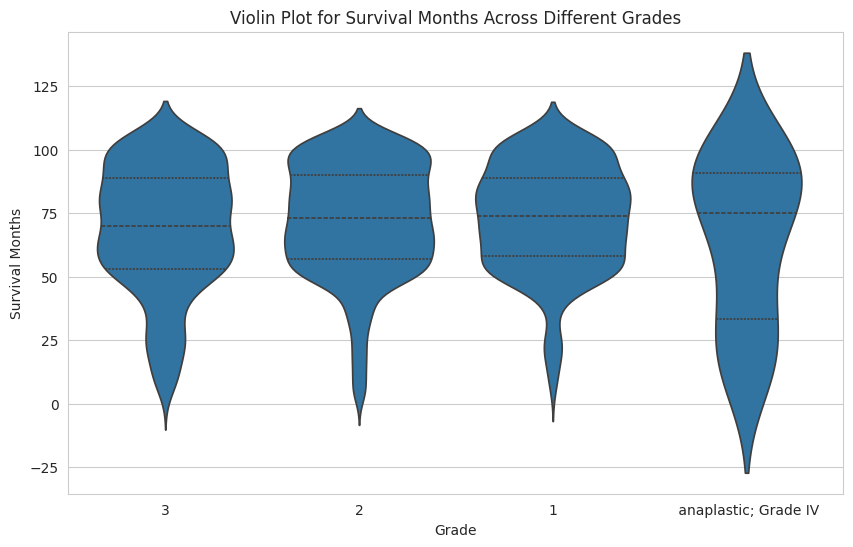

In [141]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Grade', y='Survival Months', inner='quartile')
plt.title('Violin Plot for Survival Months Across Different Grades')
plt.xlabel('Grade')
plt.ylabel('Survival Months')
plt.show()


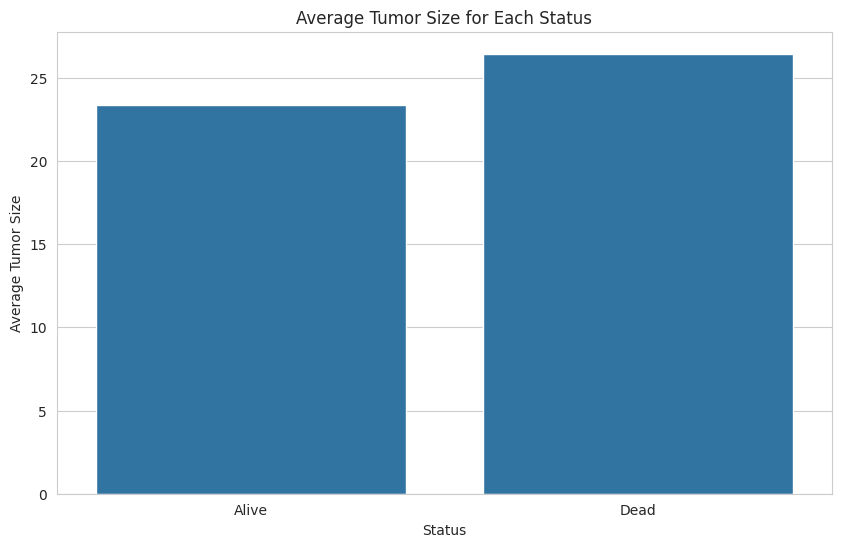

In [142]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Status', y='Tumor Size', ci=None)
plt.title('Average Tumor Size for Each Status')
plt.xlabel('Status')
plt.ylabel('Average Tumor Size')
plt.show()


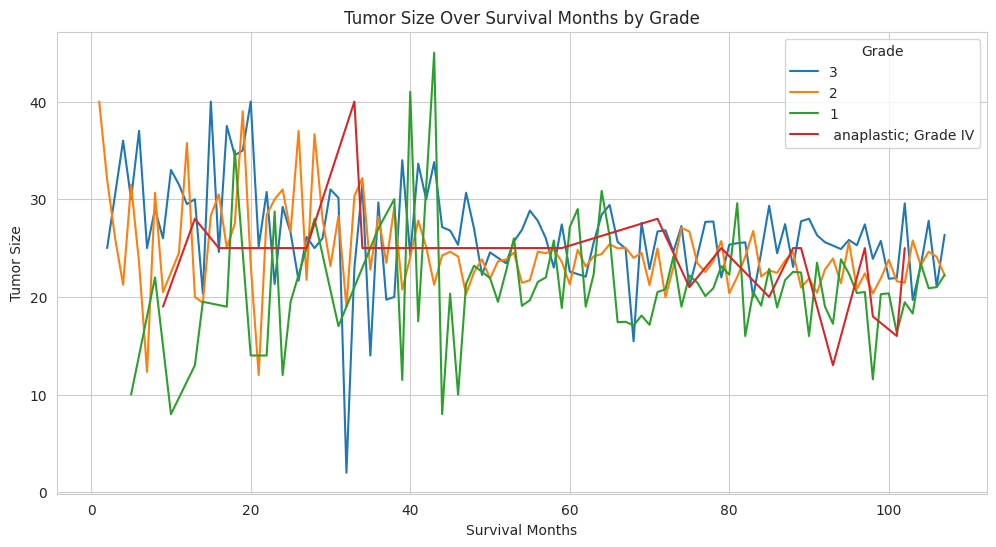

In [143]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Survival Months', y='Tumor Size', hue='Grade', ci=None)
plt.title('Tumor Size Over Survival Months by Grade')
plt.xlabel('Survival Months')
plt.ylabel('Tumor Size')
plt.legend(title='Grade')
plt.show()
